<figure> 
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Detección de anomalías</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
5. Oleg Jarma, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

##   <span style="color:blue">Introducción</span>
 

Uno de los casos de aplicación que más se ven en la vida real es la detección de anomalías. Esta implica el buscar, y encontrar, entre las observaciones obtenidas, los datos cuyo comportamiento es diferente de lo "usual". 

<figure> 
<center>
<img src="https://i0.wp.com/thedatascientist.com/wp-content/uploads/2019/02/anomaly_detection.png?fit=600%2C400&ssl=1"/> 
</center>
</figure>

###   <span style="color:blue">Diferencia entre "Anomalía" y "Atípico"</span>
 

Antes de continuar, es necesario conocer la diferencia entre dos terminos.

la respuesta más sencilla es que no hay diferencia. Estos dos terminos implican datos que son altamente distintos del resto del conjunto de datos.

Tratando de ser más específicos, podemos definir algunas diferencias:

- Los datos atípicos son datos que provienen de la misma distribución que la delr esto del conjunto de datos, solo que son casos extremos/alejados

- Las anomalías provienen de un proceso externo o de otra distribución que afecta el conjunto original. Por ejemplo ruido.

Además, ya tenemos forma de obtener datos atípicos, usando el "Rango inter Cuartílico". Mientras que no tenemos ninguna forma "algorítmica" para definir lo que es una anomalía.

###   <span style="color:blue">Aplicación en el Internet de las cosas</span>
 

La detección de anomalías tiene aplicación en muchos lados, pero donde ha habido varios casos de uso ha sido en el el Internet de las cosas (IoT) y el mantenimiento predictivo

<figure> 
<center>
<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/predictive-maintenance-diagram.svg"/> 
</center>
</figure>

##   <span style="color:blue">Aplicación</span>

Un sistema de detección puede hacerse de dos maneras:

- A la mano de un experto en el caso específico, que pueda decirnos "límites" y relaciones con los datos que nos permitan definir directamente qué es un dato con comportamiento regular y, subsecuentemente, qué datos se salen de estos.
- Analizando datos obtenidos que tengan casos anomalos y así, por medio de Aprendizaje automátizado, ajustar un modelo que pueda diferenciar estos datos.

El segundo caso ha probado ser el mejor, o por lo menos el más flexible y amigable de trabajar, pero viene con sus pequeñas debilidades.

- Necesitamos muchos datos para un buen ajuste del modelo.
- Necesitamos una buena cantidad de "fallos" o de casos de hipótesis positiva.


Los casos de detección, y sus respectivas formas de atacarlos, se pueden separar depende a la forma de nuestros conjuntos de datos.

###   <span style="color:blue">Caso supervisado</span>

Podemos encontrar conjuntos de datos en los que directamente nos dicen si las observaciones son anómalas o no. En esta situación utilizamos modelos de clasificación binaria que ya hemos visto antes.

Aquí introducimos el paquete `PyOd`. El más utilizado y predilecto para los casos de detección de anomalías. PEro podríamos usar Scikit learn para este ejercicio

In [37]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data, generate_data

In [93]:

# definimos el porcentaje de anomalías
outlier_fraction = 0.1

# generamos un dataset con dos variables independientes
X_train, X_test, y_train, y_test = generate_data(
    n_train=400, n_test=100, random_state=42, n_features=2)
 
# Obtenemos y separamos las dos características
f1 = X_train[:, [0]].reshape(-1, 1)
f2 = X_train[:, [1]].reshape(-1, 1)

Text(0, 0.5, 'Feature 2')

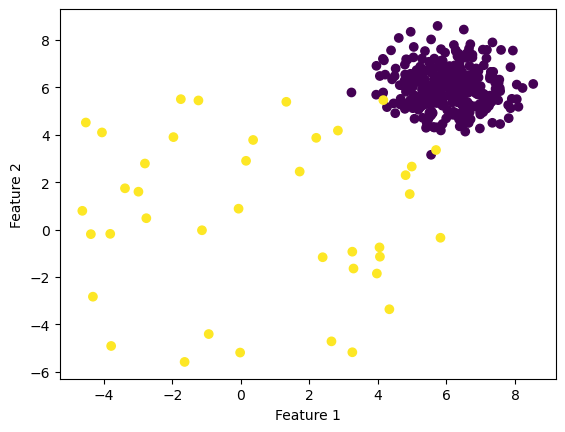

In [94]:
# scatter plot
plt.scatter(f1, f2, c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

EL número de errores obtenidos es 3


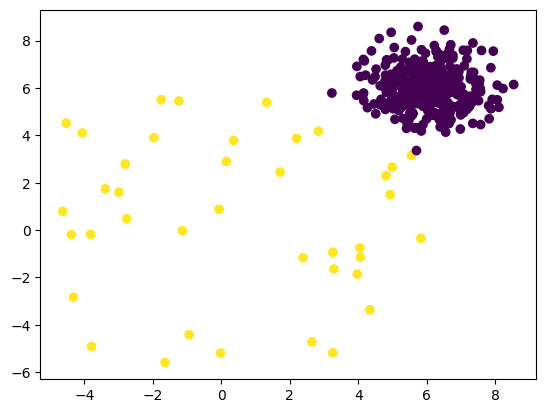

In [95]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamos el clasificador
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
 
y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()
# Contamos el número de errores en la predicción
 
print('EL número de errores obtenidos es ' + str(n_errors))

plt.scatter(f1, f2, c=y_pred)

###   <span style="color:blue">Caso no supervisado</span>

En este contexto no sabemos cuáles datos son aquellos que son anómalos. Solo suponemos que existe un pequeño porcentaje de datos que actúan de manera distinta al resto.

Aquí es necesario utilizar algoritmos diferentes. Aunque empezamos con uno conocido.

###   <span style="color:blue">Nearest Neighbors Search</span>

Recordando el ALgoritmo "K Nearest Neighbors", este lo utilizamos para clasificar datos con base en los datos que están más cercanos a este. Nosotros podemos utilizar parte de la filosofía de este modelo y adaptarla a un contexto no supervisado.

como hemos visto en la visualización, las anomalías probablemente estén más alejadas del resto de datos. Así que podemos analizar las distancias de estos puntos y definir como anomalos a aquellos que tengan los valores de distancia más altos. Podemos aprovecharnos de las nociones de distancia multivariada con las que trabaja el algoritmo KNN para este beneficio.

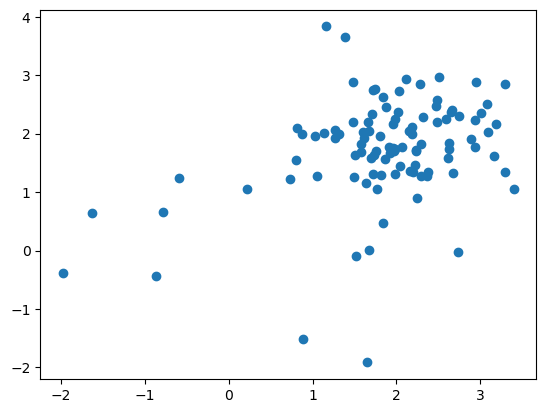

In [96]:
from sklearn.neighbors import NearestNeighbors

X_train, X_test, y_train, y_test = generate_data(
    n_train=400, n_test=100, random_state=13, n_features=6)

f1_t = X_test[:, [0]].reshape(-1, 1)
f2_t = X_test[:, [1]].reshape(-1, 1)
plt.scatter(f1_t, f2_t)

In [97]:
# create model
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_train)

distances, indexes = nbrs.kneighbors(X_test)

In [98]:
import pandas as pd

distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean.describe()

count    100.000000
mean       0.994518
std        0.470216
min        0.532703
25%        0.728590
50%        0.818040
75%        1.059265
max        2.754588
dtype: float64

In [99]:
th = 2
outlier_index = np.where(distances_mean > th)
outlier_index

(array([90, 91, 92, 94, 96, 97, 98, 99]),)

In [100]:
real_index = np.where(y_test == 1.0)

print(real_index)

(array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)


Tel número de predicciones erroneas es 0


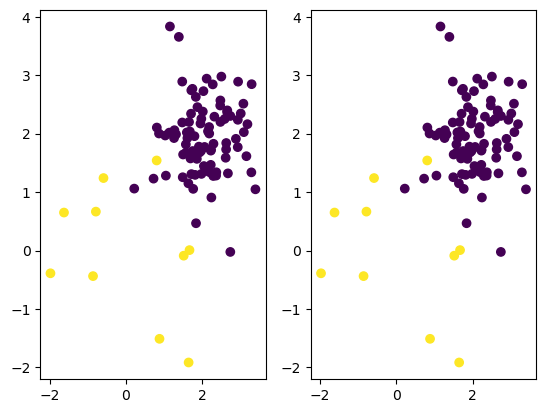

In [103]:
from pyod.models.knn import KNN

clf = KNN().fit(X_train)

y_pred = clf.predict(X_test)

n_errors = (y_pred != y_test).sum()
# Counting the number of errors
 
print('Tel número de predicciones erroneas es ' + str(n_errors))

fig, [ax1,ax2] = plt.subplots(1,2)
ax1.scatter(f1_t, f2_t, c=y_pred)
ax2.scatter(f1_t, f2_t, c=y_test)

###   <span style="color:blue">Bosques de Isolación</span>

ALguno conoce la teoría del buffalo? 

<figure> 
<center>
<img src="https://wwwcache.wralsportsfan.com/asset/voices/2018/09/20/17860720/buffalo_herd-DMID1-5g6y0g7qr-500x282.gif"/> 
</center>
</figure>

Supuestamente estos se mueven tan rápido como el más lento en su manada. Y cuando este es cazado, la velocidad general aumenta. Esto es más o menos la idea de los bosques de isolación. La idea aquí es hacer "particiones" de los datos a partir de sus diferentes características. El algoritmo funciona así:

- seleccionamos un atributo X del conjunto de datos y un valor q para separar X
    - Si en uno de los subconjuntos solo tiene un valor, este se considera un anómalo
- Repetimos la separación N veces y con todas las características.
Suponemos que los datos anomalos son aquellos que se separan más rápido del conjunto a partir de estos datos.

<figure> 
<center>
<img src="https://www.researchgate.net/publication/352017898/figure/fig1/AS:1029757483372550@1622524724599/Isolation-Forest-learned-iForest-construction-for-toy-dataset.png" height="250" width="400"> 
</center>
</figure>

<figure> 
<center>
<img src="https://miro.medium.com/max/1400/1*6GFMewU1Aax57nsW2uSakQ.png" height="400" width="600"> 
</center>
</figure>

Esta tecnica se aprovecha de dos propiedades de los datos anómalos.

- Los datos anómalos son pocos. Una cantidad muy reducida.
- Los datos anómalos están muy alejados del conglomerado

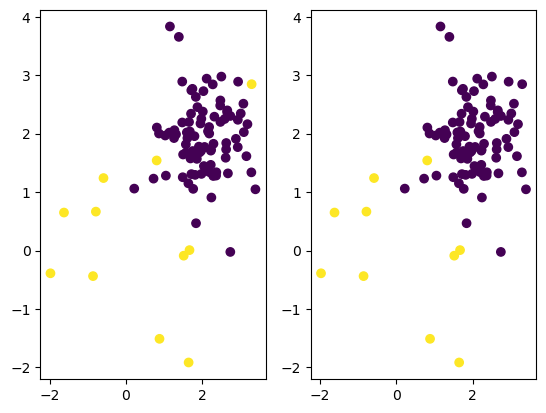

In [108]:
from sklearn.ensemble import IsolationForest


clf = IsolationForest(random_state=0).fit(X_train)

y_pred = clf.predict(X_test)
fig, [ax1,ax2] = plt.subplots(1,2)
ax1.scatter(f1_t, f2_t, c=y_pred*-1)
ax2.scatter(f1_t, f2_t, c=y_test)